In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv("dataset.csv")
df = df.reset_index()
df.head()

c:\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,0,35303,151977,Miyuki,NaN,NaN,NaN,Shibuya District,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data preprocessing (feature engineering)

price preprocessing

In [3]:
#convert data to string
df["price"] = df["price"].astype(str)

#remove the $ and ,
df["price"] = df["price"].str.replace('$','').str.replace(',', '')

#convert data to numeric
df["price"] = df["price"].apply(pd.to_numeric,errors='coerce')

#fill the NaN data with mean value 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean')
df[["price"]] = imputer.fit_transform(df[["price"]])

print(df["price"])

0         4183.0
1        11048.0
2         4171.0
3         6952.0
4         3957.0
          ...   
13044     5027.0
13045     5455.0
13046     6972.0
13047    24992.0
13048    25028.0
Name: price, Length: 13049, dtype: float64


In [4]:
#check the unique value of review_scores_rating
df["review_scores_rating"].unique()

array(['94', '95', '96', '90', '99', '91', '98', '93', '97', '100', '88',
       '87', '83', '92', '86', '89', '2020-02-16', '85', '75', '73', '82',
       '2020-01-18', '84', '2020-04-25', nan, '81', '76', '65', '80',
       '26', '11', '152', '2020-03-14', '2019-11-23', '2020-04-09',
       '2020-03-07', '79', '2020-01-04', '2020-03-22', '2020-01-06', '77',
       '70', '0', '60', '2016-12-08', '2020-01-01', '2016-12-17',
       '2016-12-09', '2020-02-09', '2020-04-16', '74', '2020-02-13',
       '2020-01-03', '68', '67', '53', '2020-04-19', '2020-02-29',
       '2020-04-15', '2020-04-21', '2020-03-27', '78', '2018-07-20',
       '2018-08-15', '2019-06-30', '2019-11-08', '2018-08-11',
       '2018-09-18', '2018-09-21', '2019-08-16', '2018-09-08',
       '2020-01-30', '2018-08-02', '2018-06-30', '2018-04-02',
       '2020-04-18', '271', '266', '2019-04-25', '64', '2020-02-12',
       '2018-01-01', '20', '40', '2020-03-17', '72', '2019-12-23',
       '2020-04-12', '2020-04-23', '2020-0

review_scores_rating preprocessing

In [5]:
#reviews score rating preprocessing

#convert the data into numeric value
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')

#fill the NaN data with mean

df[["review_scores_rating"]] = imputer.fit_transform(df[["review_scores_rating"]])
print(df["review_scores_rating"].describe())
print(df["review_scores_rating"].isna().any())

count    13049.000000
mean        93.305755
std         23.627456
min          0.000000
25%         91.000000
50%         93.305755
75%         97.000000
max       1125.000000
Name: review_scores_rating, dtype: float64
False


# Feature Selection

select 12 features and 2 targets(price and review_scores_rating) to create newDataset

In [6]:
newDataset = df[["host_total_listings_count","accommodates","bathrooms","bedrooms","beds","minimum_nights",
               "maximum_nights","minimum_minimum_nights","maximum_maximum_nights","number_of_reviews",
               "number_of_reviews_ltm","reviews_per_month","price","review_scores_rating"]]

features engineering

In [7]:
#convert features data into numeric value
newDataset = newDataset.apply(pd.to_numeric,errors='coerce')
newDataset.describe()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,reviews_per_month,price,review_scores_rating
count,12913.000000,12724.000000,12929.000000,12958.000000,1.295200e+04,12757.000000,12940.000000,12967.000000,12993.000000,12818.000000,12994.000000,11072.000000,13049.000000,13049.000000
mean,15.429645,4.584268,1.446084,1.578154,9.236752e+01,3.564379,635.935240,15.951222,752.011006,30.841551,13.472772,1.748754,26733.329077,93.305755
std,21.528738,5.105298,2.456728,5.399486,1.019280e+04,9.890471,481.168241,113.768088,458.891363,62.592330,33.226556,3.371556,79496.776675,23.627456
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,1.000000e+00,1.000000,99.000000,1.000000,365.000000,2.000000,1.000000,0.660000,6952.000000,91.000000
50%,8.000000,4.000000,1.000000,1.000000,2.000000e+00,1.000000,365.000000,1.000000,1125.000000,13.000000,8.000000,1.510000,11979.000000,93.305755
75%,19.000000,6.000000,1.500000,2.000000,3.000000e+00,2.000000,1125.000000,2.000000,1125.000000,38.000000,19.000000,2.420000,21392.000000,97.000000
max,196.000000,139.885250,139.816330,139.881960,1.160013e+06,365.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,227.000000,999995.000000,1125.000000


In [8]:
#fill the NaN data with mean

newDataset[["host_total_listings_count"]] = imputer.fit_transform(newDataset[["host_total_listings_count"]])
newDataset[["accommodates"]] = imputer.fit_transform(newDataset[["accommodates"]])
newDataset[["bathrooms"]] = imputer.fit_transform(newDataset[["bathrooms"]])
newDataset[["bedrooms"]] = imputer.fit_transform(newDataset[["bedrooms"]])
newDataset[["beds"]] = imputer.fit_transform(newDataset[["beds"]])
newDataset[["minimum_nights"]] = imputer.fit_transform(newDataset[["minimum_nights"]])
newDataset[["maximum_nights"]] = imputer.fit_transform(newDataset[["maximum_nights"]])
newDataset[["minimum_minimum_nights"]] = imputer.fit_transform(newDataset[["minimum_minimum_nights"]])
newDataset[["maximum_maximum_nights"]] = imputer.fit_transform(newDataset[["maximum_maximum_nights"]])
newDataset[["number_of_reviews"]] = imputer.fit_transform(newDataset[["number_of_reviews"]])
newDataset[["number_of_reviews_ltm"]] = imputer.fit_transform(newDataset[["number_of_reviews_ltm"]])
newDataset[["reviews_per_month"]] = imputer.fit_transform(newDataset[["reviews_per_month"]])

check the new dataset

In [9]:
print(newDataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_total_listings_count  13049 non-null  float64
 1   accommodates               13049 non-null  float64
 2   bathrooms                  13049 non-null  float64
 3   bedrooms                   13049 non-null  float64
 4   beds                       13049 non-null  float64
 5   minimum_nights             13049 non-null  float64
 6   maximum_nights             13049 non-null  float64
 7   minimum_minimum_nights     13049 non-null  float64
 8   maximum_maximum_nights     13049 non-null  float64
 9   number_of_reviews          13049 non-null  float64
 10  number_of_reviews_ltm      13049 non-null  float64
 11  reviews_per_month          13049 non-null  float64
 12  price                      13049 non-null  float64
 13  review_scores_rating       13049 non-null  flo

use label encoder to convert continous data type into multiclass (features engineering)

In [12]:
#convert review_scores_rating from continous type into multiclass type
from sklearn import preprocessing
from sklearn import utils

#set up label encoder
lab_enc = preprocessing.LabelEncoder()

#convert
newDataset["review_scores_rating"] = lab_enc.fit_transform(newDataset["review_scores_rating"])

print(utils.multiclass.type_of_target(newDataset["review_scores_rating"]))
print(utils.multiclass.type_of_target(newDataset["review_scores_rating"].astype('int')))
print(utils.multiclass.type_of_target(newDataset["review_scores_rating"]))

multiclass
multiclass
multiclass


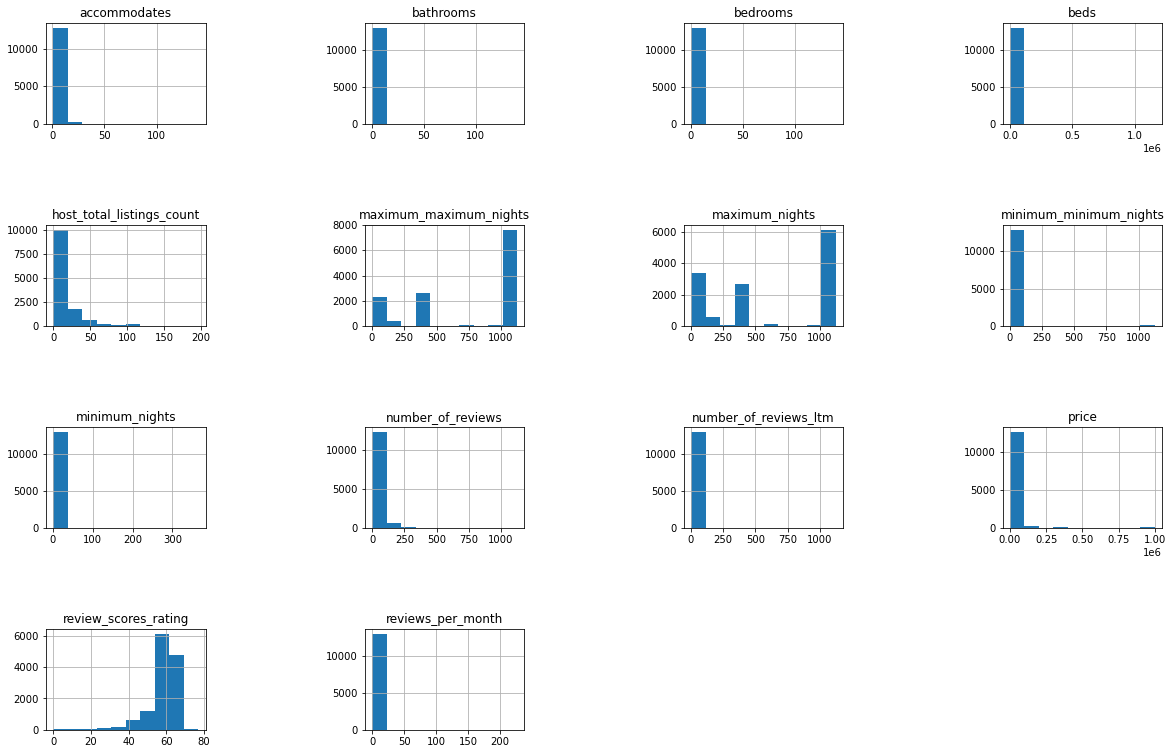

In [13]:
#visualisasi histogram dari semua data newDataset
newDataset.hist(bins = 10)
plt.subplots_adjust(hspace = 1, wspace = 1)
plt.rcParams["figure.figsize"] = [20,13]
plt.show()

# Split Data

split the newDataset into train and test

In [14]:
train, test = train_test_split(newDataset, test_size=.2, random_state=35)

convert train data and test data into csv

In [15]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)

declare trainX, trainY, testX, testY for classification model

In [16]:
trainX = train[["host_total_listings_count","accommodates","bathrooms","bedrooms","beds","minimum_nights",
               "maximum_nights","minimum_minimum_nights","maximum_maximum_nights","number_of_reviews",
               "number_of_reviews_ltm","reviews_per_month"]] 

trainY = train["price"]

testX = test[["host_total_listings_count","accommodates","bathrooms","bedrooms","beds","minimum_nights",
               "maximum_nights","minimum_minimum_nights","maximum_maximum_nights","number_of_reviews",
               "number_of_reviews_ltm","reviews_per_month"]] 

testY = test["price"]

Normalize data (features engineering)

In [17]:
#normalize data using MinMaxScaler
scaler = MinMaxScaler()
trainX= scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)

# Linear Regression

2.	Untuk linear regression saya menggunakan Mean Squared Error dan Mean Absolute error, feature engineering dan feature selection sangat memengaruhi kedua nilai metrik tersebut. Feature engineering dan feature selection berpengaruh karena dataset yang diberi sangat perlu dibersihkan dan dinormalisasikan(normalisasi menggunakan MinMaxScaler), jika feature engineering tidak dilakukan maka tidak dapat membuat model, dan feature selection diperlukan agar model tidak overfitting karena terlalu banyak feature. 

In [18]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

regression = linear_model.LinearRegression()
regression.fit(trainX, trainY)
print('Coefficients:', regression.coef_)
print('Intercept:',regression.intercept_)

prediction = regression.predict(testX)
print("MAE : ", mean_absolute_error(testY, prediction))
print("MSE : ", mean_squared_error(testY, prediction))

Coefficients: [ 136512.43651682  202070.98058    -167566.78478882   41965.09263601
   -6044.10107167 -120223.55974825   -5335.63594666    3568.23521889
   -8607.25215004  -22775.77965095  -15321.44435047   49212.96431793]
Intercept: 22693.979605865767
MAE :  23762.314723605705
MSE :  4748127857.8417635


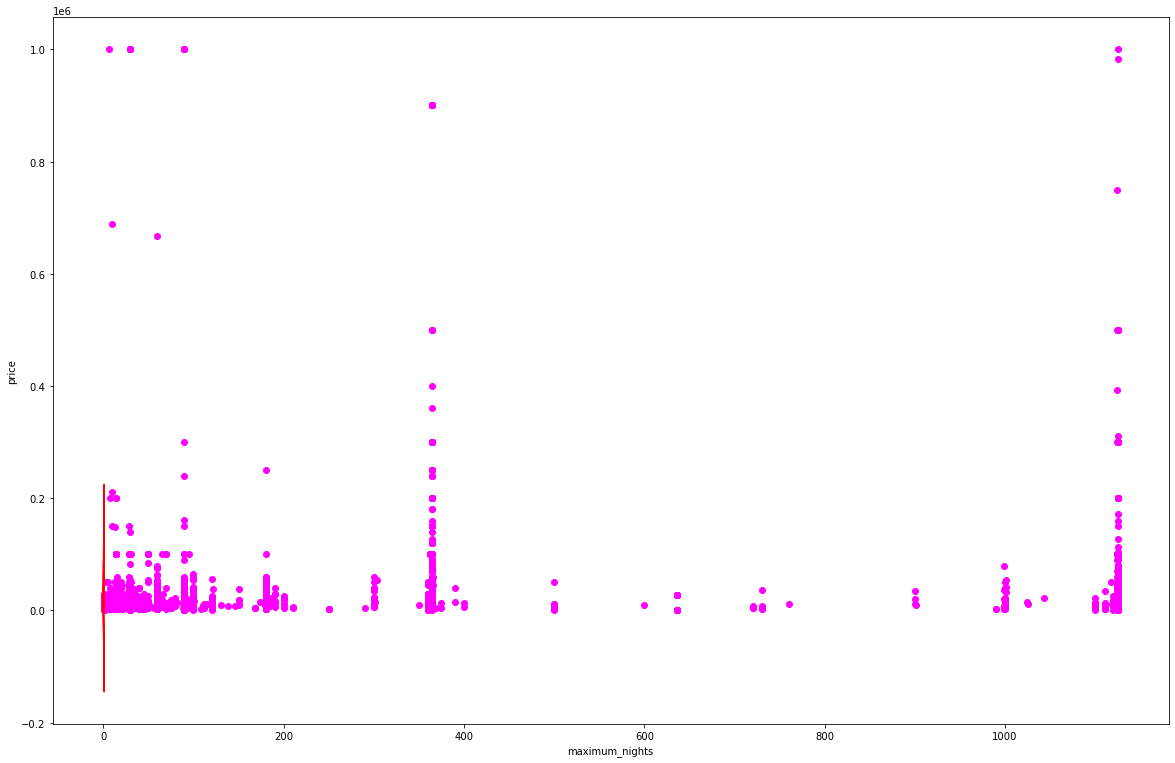

In [19]:
#graphic visualisation
plt.scatter(train[['maximum_nights']], train["price"],  color='magenta')

#aplikasi rumus y = mx+b pada matplot
#dimana m = reg.coef, x = trainX, reg.intercept = b
plt.plot(trainX, regression.coef_ * trainX + regression.intercept_, '-r')
plt.xlabel("maximum_nights")
plt.ylabel("price")

#set up size
plt.rcParams["figure.figsize"] = [9,6]
plt.show()

# Declare trainY testY for classification

In [20]:
trainY = train["review_scores_rating"]

testY = test["review_scores_rating"]

# K-Nearest Neighbour

3.	Berdasarkan praktek yang saya lakukan, dataset yang ada bersifat ‘continous’ sehingga tidak dapat membuat model klasifikasi KNN. Oleh karena itu saya menggunakan label encoder sebagai bentuk dari feature engineering guna mengubah test data (review_scores_rating) ‘continous’ menjadi ‘multiclass’ dan menormalisasi data menggunakan MinMaxScaler. Dengan itu maka model KNN bisa di buat, sedangkan feature selection memilih hanya 12 agar tidak terjadi overfitting. Metrik yang saya gunakan adalah accuracy, f1 score, mean absolute error, mean squared error.

In [21]:
#K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

#create model and evaluate model
KNN = KNeighborsClassifier(n_neighbors = 3).fit(trainX, trainY)
classification = KNN.predict(testX)

#print metrics
print("Accuracy : %.2f" % accuracy_score(testY, classification))
print("f1_score : %.2f"% f1_score(testY, classification, average='weighted') )
print("MAE : %.2f" % mean_absolute_error(testY, classification))
print("MSE : %.2f" % mean_squared_error(testY, classification))

Accuracy : 0.14
f1_score : 0.15
MAE : 7.34
MSE : 149.36


In [24]:
#identify the best K
K = 10
acc = np.zeros((K-1))
for i in range(1, K):    
    KNN = KNeighborsClassifier(n_neighbors = i).fit(trainX, trainY)  
    classification = KNN.predict(testX)
    acc[i-1] = accuracy_score(testY, classification)

#print the best accuracy and k
print("Best Accuracy= %.2f" % acc.max(), "|| k= ", acc.argmax()+1)

Best Accuracy= 0.18 || k=  9


# Support Vector Machine

4.	Feature engineering mempengaruhi karena jika tidak dilakukan tidak akan bisa membuat model SVM, dan juga feature selection memilih 12 fitur agar tidak terjadi overfitting. Dan juga dataset yang ada bersifat ‘continous’ sehingga tidak dapat membuat model klasifikasi. Oleh karena itu saya menggunakan label encoder sebagai bentuk dari feature engineering guna mengubah test data (review_scores_rating) ‘continous’ menjadi ‘multiclass’ dan menormalisasi data menggunakan MinMaxScaler. Metrik yang saya gunakan : accuracy, f1 score, mean absolute error, mean squared error. Didapat hasil semua metrik lebih tinggi dibanding hasil metrik algoritma lainnya

In [25]:
#Support Vector Machine
from sklearn import svm

#create model and evaluate model
SVM = svm.SVC().fit(trainX, trainY)
classification = SVM.predict(testX)
training = SVM.predict(trainX)

#print metrics
print("Accuracy : %.2f" % accuracy_score(testY, classification))
print("f1_score : %.2f"% f1_score(testY, classification, average='weighted') )
print("MAE : %.2f" % mean_absolute_error(testY, classification))
print("MSE : %.2f" % mean_squared_error(testY, classification))

Accuracy : 0.20
f1_score : 0.12
MAE : 5.47
MSE : 77.25


Train set acc:  0.19532522272248298
Test set acc:  0.11417624521072797


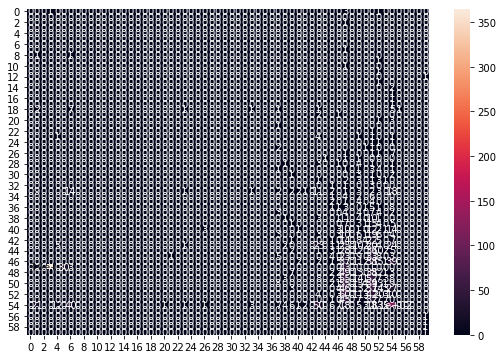

In [27]:
print("Train set acc: ", metrics.accuracy_score(trainY, training))
print("Test set acc: ", metrics.accuracy_score(testY, classification))
conf_matrix = metrics.confusion_matrix(testY, classification)
sb.heatmap(conf_matrix, annot=True)
plt.show()

# Decision Tree

5.	Feature engineering dan feature selection mempengaruhi karena jika tidak dilakukan tidak akan bisa membuat model klasifikasi, dan pemilihan feature dari 30 menjadi 12 agar tidak terjadi overfitting. Dan juga dataset yang ada bersifat ‘continous’ sehingga tidak dapat membuat model klasifikasi. Oleh karena itu saya menggunakan label encoder sebagai bentuk dari feature engineering guna mengubah test data (review_scores_rating) ‘continous’ menjadi ‘multiclass’ dan menormalisasi data menggunakan MinMaxScaler, tetapi dibanding model klasifikasi lainnya, nilai metrik classification tree yang digunakan (Decision Tree) memperoleh nilai metrik terendah

In [28]:
#Decision Tree
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier

#create model and evaluate model
DST = DecisionTreeClassifier(criterion="gini", max_depth = 10).fit(trainX, trainY) 
classification = DST.predict(testX)

#print metrics
print("Accuracy : %.2f" % accuracy_score(testY, classification))
print("f1_score : %.2f"% f1_score(testY, classification, average='weighted') )
print("MAE : %.2f" % mean_absolute_error(testY, classification))
print("MSE : %.2f" % mean_squared_error(testY, classification))

Accuracy : 0.12
f1_score : 0.11
MAE : 14.88
MSE : 608.45


Decision tree visualization using graphviz

c:\python\python36\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.52609 to fit



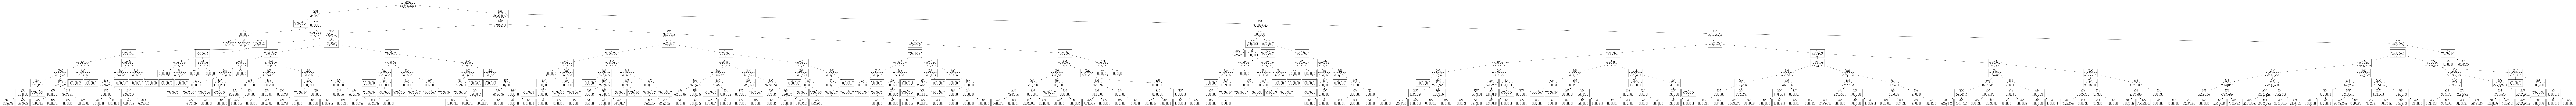

In [29]:
import pydotplus as pdp
from IPython.display import Image  
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz

#use stringIO as result
result = StringIO()

#put result in export_graphviz function
export_graphviz(DST, out_file = result)

#get tree using result.getValue
tree = pdp.graph_from_dot_data(result.getvalue())  

#visualize tree using png format
Image(tree.create_png())

# Gaussian Mixture Model

6. Gauissan Mixture Model menampilkan data persebaran 12 fitur berdasarkan model probablistik yang menunjukan distribusi normal. Distribusi normal diskalakan berbeda varian dan rata rata yang berbeda. Selain itu untuk gaussian mixture model akan memakai 4 cluster (n_components=4). Dari 12 data yang terpilih menjadi fitur akan dikelompokan menjadi 4 cluster berdasarkan nilai distribusi normal

In [33]:
#Declare X as feature data for clustering model
X = newDataset[["host_total_listings_count","accommodates","bathrooms","bedrooms","beds","minimum_nights",
               "maximum_nights","minimum_minimum_nights","maximum_maximum_nights","number_of_reviews",
               "number_of_reviews_ltm","reviews_per_month"]]

Ypredict =  [0 2 2 ... 3 2 0]
GMM =  0.744023801385572


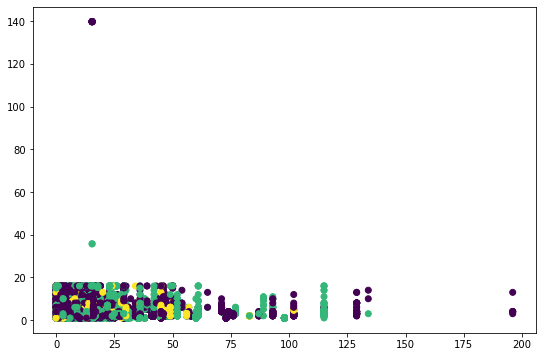

In [34]:
#declare gmm, with 4 clusters
gmm = GaussianMixture(n_components=4).fit(X)

#predict X
ypred = gmm.predict(X)

#print Ypredict and GMM
print("Ypredict = ", ypred)
print("GMM = ", silhouette_score(X, ypred))

#visualize GMM using scatter plot
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=ypred)
plt.show()

# K Means Clustering

7.	K Means Clustering adalah metode clustering yang berjenis unsupervised learning algorithm, algoritma ini bertujuan mengelompokan objek berdasarkan kemiripan dari k groups, yang dihitung berdasarkan Euclidean Distance. K Means menampilkan persebaran 12 fitur data dengan cara, pertama – tama train model terlebih dahulu dan menentukan clusternya, pada kasus ini saya akan mendeklarasikan n_clusters = 3. Jadi dari 12 fitur ini akan dikelompokan menjadi 3 cluster. Seperti pada file ipynb, terdapat Y prediction yang terdiri dari 0,1,2 menandakan terdapat 3 cluster yang dilabelkan dengan 0,1, dan 2.

In [35]:
#declare kmeans, dan tentukan cluster = 3
kmeans = KMeans(n_clusters=3).fit(X)

#tentukan label kmeans
k_label = kmeans.labels_

#declare K cluster centers
k_clusterCenter = kmeans.cluster_centers_

#memprediksi kmeans berdasarkan data X
ypred = kmeans.predict(X)

#print klabel, kclustercenter, and y prediction
print("Kmeans Label = ", k_label)
print("Kmeans Cluster Center =  ", k_clusterCenter)
print("Y Prediction = ", ypred)

Kmeans Label =  [0 2 2 ... 2 2 0]
Kmeans Cluster Center =   [[1.56697635e+01 4.84015347e+00 1.31896338e+00 1.38954429e+00
  3.15576240e+00 4.36810204e+00 1.12108062e+03 4.02599904e+00
  1.12199807e+03 2.92640026e+01 1.21998074e+01 1.75722449e+00]
 [1.54296445e+01 4.58426816e+00 1.44608357e+00 1.57815418e+00
  1.16001300e+06 4.50000000e+00 3.00000000e+00 8.00000000e+00
  7.52011006e+02 1.00000000e+00 1.00000000e+00 1.00000000e+01]
 [1.52101666e+01 4.35037914e+00 1.56227631e+00 1.75055086e+00
  3.75930926e+00 2.82960714e+00 1.92586561e+02 2.68525011e+01
  4.13828606e+02 3.22878683e+01 1.46381403e+01 1.73980051e+00]]
Y Prediction =  [0 2 2 ... 2 2 0]


kmeans visualization using elbow curve

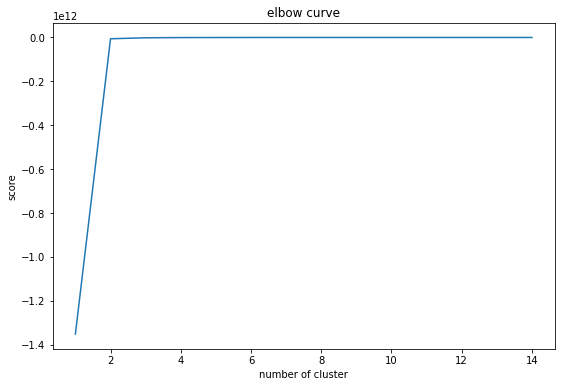

In [36]:
#set up range for K
K = range(1,15)

#declare score
Kmeanss = [KMeans(n_clusters=i) for i in K]
score = [Kmeanss[i].fit(X).score(X) for i in range(len(Kmeanss))]

#plot data using K and score
plt.plot(K, score)

#set title, x label and ylabel
plt.title("elbow curve")
plt.xlabel("number of cluster")
plt.ylabel("score")

#show visualization
plt.show()

Kmeans visualization

KMeans=   0.7419975588729346


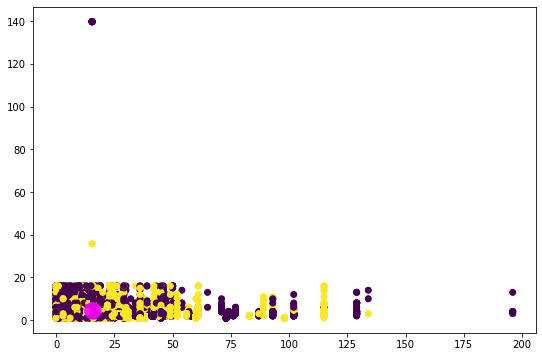

In [38]:
print("KMeans=  ", silhouette_score(X, ypred))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=ypred)
plt.scatter(k_clusterCenter[:,0], k_clusterCenter[:,1], s=200, alpha=0.5,c="magenta");
plt.show()